# This Notebook is my cheatsheet for Using Pandas

### Importing pandas into your project

In [3]:
#%matplotlib ipympl
%matplotlib inline

# you must import Pandas
# inporting them as pd will save you typing pandas over and over again.
import pandas as pd     # if you get an error message module not found you need to add this to your environment.
import os               # this tells your project about the OS of your machine.  This will let you create machine independent notebooks
import numpy as np      # loads in the math tools
import scipy.stats as st
import os

# For plotting we add addtional dependencies
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns



### Working with Jupyter Notebooks not VSCode
This code will change the width

In [4]:
# change the width of a jupyter notebook in a browser 
# Remove the Comments from the two line below
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

### Checking your environment

In [5]:
pd.__version__          #check the version.
#pd.show_versions()      #this will show the version of installed packages such as panda, and its dependencies.

'1.5.2'

# Make your Dataframe by Reading in files

In [6]:
# import os is needed to build the os independent path.
# Store filepath in a variable
# file_one = "Resources/DataOne.csv"
file_one = os.path.join('.','Resources', 'Olympics.csv')            # In this example my Jupyter notebook is in the current directory " . "
                                                                    # There is a sub directory "Resources" and a file there "Olympics.csv"
oo_df = pd.read_csv(file_one, encoding="utf-8")                     # Opens the CVS file and read it in as a panda dataframe 


#output_dir = os.path.join('.','Output')                            # Specifiy the path for an output file.
#os.mkdir(output_dir)                                               # Create a directory for the output
file_one = os.path.join('.','Output', 'MyFileName.csv')
oo_df.to_csv(file_one, index=False, header=True)                    # Writes out MyFileName.cvs into the subdirectory "Output"   

oo_df.head()       # Prints out the first five rows of the data frame by default, pass an iteger argument for more or less rows

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Age
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,35
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,28
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,33
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,22
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,18


# Understanding Sorting

In [7]:
# Sorting with the index i.e. the first column
oo_df.sort_index(inplace = True, ascending=True)                                    # sort by the index. inplace = True means that it will be permanant.
a = oo_df.sort_index(ascending=True)                                                # create a new dataframe sort by the index.

# Sort by other columns and multiple columns
a = oo_df.sort_values(by='Edition',ascending=False)                                 # the order is changed but the orginal index numbers remain the same
a = oo_df.sort_values(by='Edition',ascending=False, ignore_index=True)              # with ignore_index set to true the index is reset top row = index 0
a = oo_df.sort_values(by=['Discipline','Sport', 'Event'])                           # Sort by multiple columns
a = oo_df.sort_values(by=['Age','Sport', 'Event'], ascending=[False, True, True])   # Sort by multiple columns with some acending and some decending

a.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Age
1142,London,1908,Aquatics,Swimming,"DAM, Hans Peter Ludwig",DEN,Men,100m backstroke,M,Silver,40
4139,Paris,1924,Aquatics,Swimming,"BAUER, Sybil",USA,Women,100m backstroke,W,Gold,40
5726,Los Angeles,1932,Aquatics,Swimming,"KAWATSU, Kentaro",JPN,Men,100m backstroke,M,Bronze,40
15227,Moscow,1980,Aquatics,Swimming,"GEWENIGER, Ute",GDR,Women,100m breaststroke,W,Gold,40
16610,Los Angeles,1984,Aquatics,Swimming,"EVANS, Peter",AUS,Men,100m breaststroke,M,Bronze,40


# Understanding the data frame index

In [8]:
# the index is the first column of the dataframe
# when the data frame is created it is populated with 0 through the number of rows of data you have
# once created the index in imutable

# Using the index to select data
oo_df['City'][100]      # col city row 100 or index 100
oo_df.City[100]         # col city row 100 or index 100

# Changeing the index to one of the other columns
# the data frame can be reindexed.
oo_df.set_index('Athlete', inplace=False)               # set the index to Athlete.  To make in permentaly (inplace = True)
a = oo_df.set_index('Athlete')                          # a is a new data frame that is indexed by Athlete
a = a.reset_index(inplace=True)                         # reset index to the default integer based index with the first row 0 to last row n where n-1 is the number of rows
a = oo_df.set_index('Athlete')                          # a is a new data frame that is indexed by Athlete
a.sort_index(inplace = True, ascending=True)            # a is now sorted by the index which is the Athletes name.
a = oo_df.set_index(['City','Edition'])                 # a is a data frame with a two level index.  This is like a pivot table with two valuse in the rows.

a.head()

Sport Discipline             Athlete  NOC Gender  \
City   Edition                                                        
Athens 1896     Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
       1896     Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
       1896     Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
       1896     Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
       1896     Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                                     Event Event_gender   Medal  Age  
City   Edition                                                        
Athens 1896                 100m freestyle            M    Gold   35  
       1896                 100m freestyle            M  Silver   28  
       1896     100m freestyle for sailors            M  Bronze   33  
       1896     100m freestyle for sailors            M    Gold   22  
       1896     100m freestyle for sailors            M  Silver   18

### Basic Quality Checks of your Dataframe

In [9]:
# print datafram info.  Check the for (number of each element, thier type i.e. are numbers floats of ints?  
# If they are not ints or floats it means there is string data in your data.  If the count is not the same it 
# means there are blanks of NaN.
oo_df.info()

oo_df.tail()                                    # look at the last five row
oo_df.describe()                                # gives basic statistics for numeric elements of the dataframe
oo_df.shape                                     # Returns a tuple (# of rows, # of columns)
numRows = oo_df.shape[0]                        # find the number of rows
numCol = oo_df.shape[1]                         # find the number of columns
numRow =len(oo_df.index)                        # Determin the number of rows in a datafram
oo_df.index                                     # Determine the number of rows in the dataframe
Event_count = len(oo_df["Event"].unique())      # Calculate the number of unique values in a column of a DataFrame
oo_df.shape                                     # This is a parameter not a method so no ()
oo_df.columns                                   # list the column headers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
 10  Age           29216 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal', 'Age'],
      dtype='object')

### Fixing Missing or erroneous data

In [10]:
oo_df = oo_df.dropna(how='any')                                 # Drop all rows with missing information
oo_df = oo_df.fillna(value = 500)                               # Replace na with a value.  Common choices are 0, the average, the most likely value, or eliminate those rows.
oo_df['Athlete'] = oo_df['Athlete'].fillna(value='unknown')     # Fills NaN with another value
oo_df = oo_df.astype({"Age": int})                              # Use df.astype() method to convert the datatype e.g. age as a string to age as an int.
a = oo_df[oo_df['Age'].isnull()]                                # creates a data of all rows where age is null

# Replace similar names, correct typos, etc. in the data set
oo_df['City'] = oo_df['City'].replace({'BEIJING': 'Beijing', 'Bijing': 'Beijing'})           
#df = df.astype({"Alarm Date and Time": "datetime64"})          # converts string representation of datetime to a datetime value.
# oo_df = oo_df.rename(columns={"Edition": "Year"})

# create a data frame of the duplicate records
a = oo_df[oo_df.duplicated(subset=['Athlete','Edition','Event','Medal','Discipline'],keep=False)]

# remove duplicate records
b = oo_df.drop_duplicates(subset=['Edition','Event','Athlete'],keep='first')

a.head(20)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Age
16098,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,Men,hockey,M,Gold,25
16099,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,Men,hockey,M,Gold,35


### Make Dataframe more readable and useable
Rename columns eleminate extra columns etc.

In [11]:
#del oo_df['column_name']                                       # the name of a column you want delete
oo_df.count()                                                   # Count non-NA cells.  Check that all the column are complete (equal number of elements)-- Identify incomplete rows
oo_df.dtypes                                                    # Idetify the data types

#rename column headings
oo_df = oo_df.rename(columns={"Event_gender":"Event Gender"})

# reduce the data frame by selecting on the data you need.
a = oo_df[['City','Edition','Athlete','NOC']]                   
a.head(2) 

,City,Edition,Athlete,NOC
0,Athens,1896,"HAJOS, Alfred",HUN
1,Athens,1896,"HERSCHMANN, Otto",AUT


### Adding columns to dataframe - Calculating new column, measurement conversions

In [12]:

oo_df['Full Sport']=oo_df['Sport'] + ' ' + oo_df['Discipline']  # Add columns based on calculations
oo_df['Age in Months']=oo_df['Age']*12
oo_df.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event Gender,Medal,Age,Full Sport,Age in Months
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,35,Aquatics Swimming,420
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,28,Aquatics Swimming,336


### Basic Analysis

In [13]:
# Numeric Columns
oo_df['Age'].mean()                             #find the mean of a numeric column                                          
oo_df['Age'].sum()                              #find the sum of a numeric column

# Catagorica  Columns
oo_df[oo_df['Athlete']== 'BOLT, Usain']         # Not perferred Find rows with Usain Bolt as the Athlete
oo_df.loc[oo_df['Athlete']== 'BOLT, Usain']     # Find rows with Usain Bolt as the Athlete  --- loc is the perfered method (there are some bondry case where it is critical)


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event Gender,Medal,Age,Full Sport,Age in Months
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold,19,Athletics Athletics,228
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold,20,Athletics Athletics,240
27603,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,4x100m relay,M,Gold,40,Athletics Athletics,480


In [14]:
ath = oo_df['Athlete'].sort_values()          # This sorts the series but it does not change the data frame.  The datafram is still in the orginal order.
oo_df.sort_values(by=['Edition','Athlete'])   # This sorts frist by Edition and then by Athlete in assending order.
ath = oo_df['Athlete'].reset_index(drop=True) # This reset the index to go from 0 to n.  The drop get rid of row with missing data.


### Using loc to locate or select records

In [15]:
a = oo_df['Medal']=='Gold'                                          # a is a panda series containing only True and False in the rows with gold medals
a = oo_df.loc[oo_df['Medal']=='Gold']                               # a is a Dataframe contain only the row with Medal = tp Gold.
a = oo_df.loc[(oo_df['Medal']=='Gold') & (oo_df['Gender']=='Women')]# a is a Dataframe contain only woman AND goal metal.  AND uses an "&", Or uses the "|" a
a = oo_df.loc[oo_df['NOC'].str.contains('U')]                       # a is a Dataframe containg NOC containing the letter 'U'
a = oo_df.loc[oo_df['NOC'].str.contains('U')]                       # a is a Dataframe containg NOC containing the letter 'U'
a = oo_df.loc[oo_df['NOC'].str.isnumeric()]                         # a is a Dataframe containg NOC which are numberic
a = oo_df.loc[oo_df['NOC'].str.startswith('A')]                     # a is a Dataframe with NOC that start with the letter 'A'
a = oo_df.loc[oo_df['Age']<30]                                      # a is a Dataframe contain only those under age 30

# a is a Dataframe contain men that won gold in the 100m
a = oo_df.loc[(oo_df['Event']=='100m') & (oo_df['Gender']=='Men') & (oo_df['Medal']=='Gold')]                   
a.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event Gender,Medal,Age,Full Sport,Age in Months
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold,39,Athletics Athletics,468
231,Paris,1900,Athletics,Athletics,"JARVIS, Francis",USA,Men,100m,M,Gold,38,Athletics Athletics,456
737,St Louis,1904,Athletics,Athletics,"HAHN, Archie",USA,Men,100m,M,Gold,37,Athletics Athletics,444
1191,London,1908,Athletics,Athletics,"WALKER, Reginald",RSA,Men,100m,M,Gold,24,Athletics Athletics,288
2022,Stockholm,1912,Athletics,Athletics,"CRAIG, Ralph",USA,Men,100m,M,Gold,27,Athletics Athletics,324


### Select or change a cell

In [16]:
oo_df.at[1,'City']                      # reads the value at the intersection of index 1 and the city column
oo_df.at[1,'City'] = 'new name'         # writes a new value to index 1 and the city column
oo_df.at[1,'City'] = 'Athens'           # restore my data frame

### Using iloc to locate or select records
Mainly used when the data 

In [17]:
oo_df.iloc[1700]                            # this looks up a record by the interger record value of 1700
oo_df.iloc[[1542, 2390, 6000]]              # this looks up a record using a list of record values.
oo_df.iloc[20:25]                           # look up records using plython slicing rules
a = oo_df.set_index('Athlete').iloc[20:25]  # while often used with the default integer index it also works with other indexs

a.head(2)


,City,Edition,Sport,Discipline,NOC,Gender,Event,Event Gender,Medal,Age,Full Sport,Age in Months
Athlete,,,,,,,,,,,,
"GMELIN, Charles",Athens,1896,Athletics,Athletics,GBR,Men,400m,M,Bronze,24,Athletics Athletics,288
"BURKE, Thomas",Athens,1896,Athletics,Athletics,USA,Men,400m,M,Gold,34,Athletics Athletics,408


# Groupby

In [18]:

a = oo_df.groupby(["NOC"])         # create a dta frame grouped by city (this is similar to an Excel pivot table with city as the row)
a.count().head(2)                   # This is like a pivot table with 'City' in the rows and count of every other column as columns
a.first()                           # The first group
a.last()                            # The last group
a.size()                            # The size or number of records in each group
a.mean()                            # The mean of for all of the numeric columns in each group
a.max()                             # ?
a.min()
a.first()

a.head()

C:\Users\jspinega\AppData\Local\Temp\ipykernel_20740\4097950689.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a.mean()                            # The mean of for all of the numeric columns in each group


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event Gender,Medal,Age,Full Sport,Age in Months
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,35,Aquatics Swimming,420
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,28,Aquatics Swimming,336
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,33,Aquatics Swimming,396
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,22,Aquatics Swimming,264
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,18,Aquatics Swimming,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29102,Beijing,2008,Weightlifting,Weightlifting,"HOANG, Anh Tuan",VIE,Men,"- 56kg, total (bantamweight)",M,Silver,35,Weightlifting Weightlifting,420
29127,Beijing,2008,Weightlifting,Weightlifting,"MARTIROSYAN, Tigran Gevorg",ARM,Men,69kg,M,Bronze,24,Weightlifting Weightlifting,288
29180,Beijing,2008,Wrestling,Wrestling Free.,"ABDUSALOMOV, Yusup",TJK,Men,74 - 84kg,M,Silver,38,Wrestling Wrestling Free.,456
29194,Beijing,2008,Wrestling,Wrestling Gre-R,"TIUMENBAEV, Ruslan",KGZ,Men,55 - 60kg,M,Bronze,36,Wrestling Wrestling Gre-R,432


### Groupby and Aggregation functions

In [19]:
#Aggregation function 
#applies the functions in the list (min, max, count,) across all columns 
oo_df.groupby(['Edition','NOC','Medal']).agg(['min','max','count'])

# use a dictionary rather then the list and specify which columns and statices you want for those columns.
oo_df.groupby(['Edition','NOC','Medal']).agg({'Age' :['min','max','count','mean'],'Age in Months' :['min','max','count']})

oo_df.loc[oo_df.Athlete == 'LEWIS, Carl'].groupby('Athlete').agg({'Edition' : ['min','max','count']})
a=oo_df.groupby('Athlete').agg({'Edition' : ['min','max','count']})
a.head(2)


Edition            
                          min   max count
Athlete                                  
AABYE, Edgar             1900  1900     1
AALTONEN, Arvo Ossian    1920  1920     2

In [20]:
# Now do some calculations based on the group agg calculations.  Notice that the values are referenced as tuples.
a[('Edition','Range')]=a[('Edition','max')] - a[('Edition','min')]
a.head(2)

Edition                  
                          min   max count Range
Athlete                                        
AABYE, Edgar             1900  1900     1     0
AALTONEN, Arvo Ossian    1920  1920     2     0

### Building a new dataframe by combining groupby dataframes (Building a Pivot Table)
Creating series data that is summerizes by the group (mean, count, sum, etc.) <br>
Assebling the series data into a new dataframe

In [21]:
grouped_city_df = oo_df.groupby(['City'])
city_avg_age = grouped_city_df['Age'].mean()                            # Equivelent to a Pivot table with city in the rows and Age in the column set to calculate the average (mean) age.
city_medal_count = grouped_city_df['Medal'].count()                     # Equivelent to a Pivot table with city in the rows and count of medals as the column
City_summary_df = pd.DataFrame({'Athete Avg Age':city_avg_age,          # Put the two serices back together as a new data frame - Pivot table with city in the rows 
                                'Medal Count':city_medal_count})        # and averge age and medal count as the two columns.
City_summary_df.head()


,Athete Avg Age,Medal Count
City,,
Amsterdam,28.784507,710
Antwerp,29.021572,1298
Athens,29.073057,2149
Atlanta,28.891877,1859
Barcelona,29.271554,1705


### Merging Data frames based on a share column (Excel vlookup or xlookup)

In [22]:
# Create sample dataframe #1
info_df = pd.DataFrame({
    "customer_id": [112, 403, 999, 543, 123],
    "name": ["John", "Kelly", "Sam", "April", "Bobbo"],
    "email": ["jman@gmail", "kelly@aol.com", "sports@school.edu", "April@yahoo.com", "HeyImBobbo@msn.com"]})

# Create sample data frame #2
items_df = pd.DataFrame({
    "customer_id": [403, 112, 543, 999, 654],
    "item": ["soda", "chips", "TV", "Laptop", "Cooler"],
    "cost": [3.00, 4.50, 600, 900, 150]})

# Merge two dataframes using an inner join (using the common element 'customer_id')
# how=left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
# how=right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
# how=outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
# how=inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
# how=cross: creates the cartesian product from both frames, preserves the order of the left keys.

# Merge inner
merge_df = pd.merge(info_df, items_df, on="customer_id", how="inner")    #on can be a list ['field1','field2', ...]
print(merge_df)
print('\n|--------------------------------------------------------| \n')
merge_df = pd.merge(info_df, items_df, on="customer_id", how="outer")    #on can be a list ['field1','field2', ...]
print(merge_df)

   customer_id   name              email    item   cost
0          112   John         jman@gmail   chips    4.5
1          403  Kelly      kelly@aol.com    soda    3.0
2          999    Sam  sports@school.edu  Laptop  900.0
3          543  April    April@yahoo.com      TV  600.0

|--------------------------------------------------------| 

   customer_id   name               email    item   cost
0          112   John          jman@gmail   chips    4.5
1          403  Kelly       kelly@aol.com    soda    3.0
2          999    Sam   sports@school.edu  Laptop  900.0
3          543  April     April@yahoo.com      TV  600.0
4          123  Bobbo  HeyImBobbo@msn.com     NaN    NaN
5          654    NaN                 NaN  Cooler  150.0


### Stacking and Unstacking

<AxesSubplot: xlabel='Edition'>

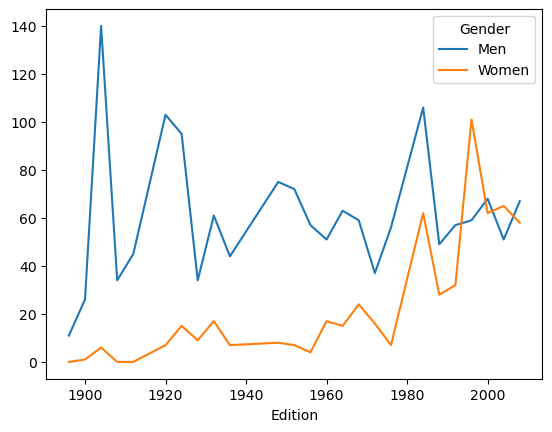

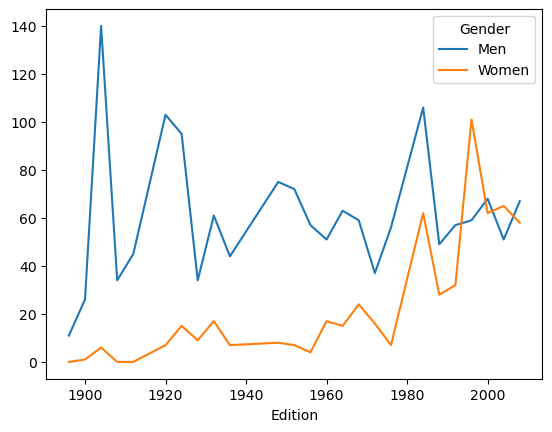

In [23]:
#Plot the number of gold medal won by the USA male and female atherlet though out history
a = oo_df[(oo_df['NOC']=='USA') & (oo_df['Medal']=='Gold')]         #select the right set of records
#This could be all one one big line of code
a.groupby(['Edition','Gender']).size().unstack('Gender', fill_value=0).plot()

# or done step by step
a=a.groupby(['Edition','Gender']).size()                            #Group them by Edition (year) and gender
a=a.unstack('Gender', fill_value=0)                                 # unstack the Gender i.e. make seperate column for each
a.plot()                                                            # plot the picture

### Convert a Panda Series to a list

In [24]:
# salary_list = data["Salary"].tolist()
a = oo_df['Medal']=='Gold' 
b = a.tolist()
print (f'a is type {type(a)} and b is type {type(b)} ')

a is type <class 'pandas.core.series.Series'> and b is type <class 'list'> 


# Basic Plotting

In [25]:
# For plotting we add addtional dependencies
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline

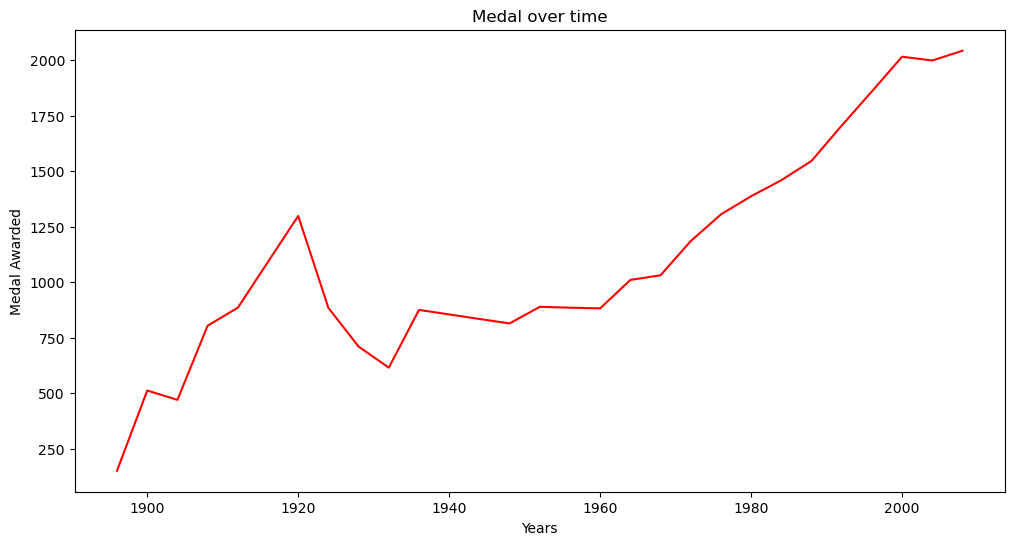

In [26]:
#plot the number of medal issue over history.  
#   Edition tells us the year, 
#   value_counts gives us the count for each addition, 
#   sort_index puts the list into chronilogical order (not sure why it was out of order)
#   plot creates the plot
# danger_drop, = plt.plot(time, danger_drop_speeds, color="red", label="Danger Drop")
# railgun, = plt.plot(time, railgun_speeds, color="blue", label="RailGun")
a=oo_df['Edition'].value_counts().sort_index()
plt.title("Medal over time")
plt.xlabel("Years")
plt.ylabel("Medal Awarded")
plt.grid()                                                          # Dosen't work here does work in a Jupiter notebook
#plt.legend(handles=[Medals], loc="best")                           # add a legend - perhaps it is not woking because I only have one line
Medals = a.plot(color='red', label='Medals', figsize= (12,6))


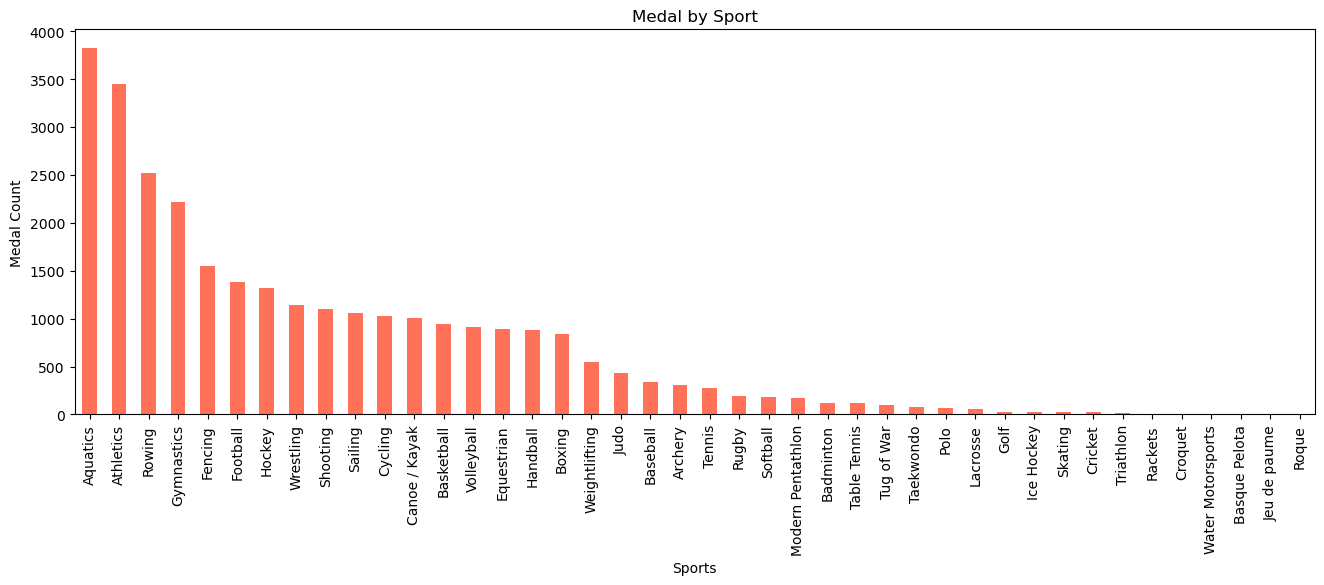

In [27]:
# for color choices see matplotlib named_colors.jpynb
plt.title("Medal by Sport")
plt.ylabel("Medal Count")
plt.xlabel("Sports")
oo_df['Sport'].value_counts().plot(kind='bar', color='tomato', figsize=(16,5), alpha=0.9, align="center"); #alpha set transparance use if there is overlapping data 1 = solid 0= invisible

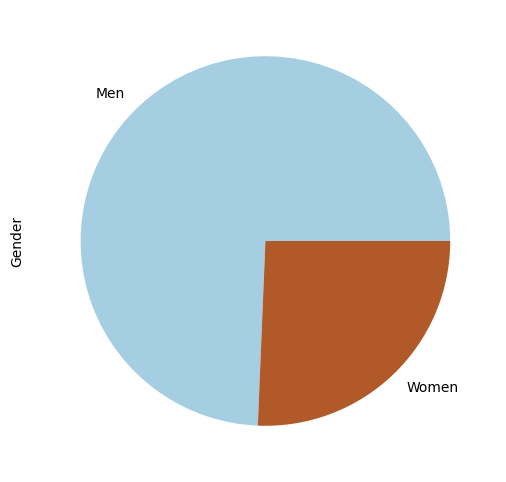

In [28]:
#Panda pie chart
oo_df['Gender'].value_counts().plot(kind='pie', colormap='Paired', figsize=(6,6));

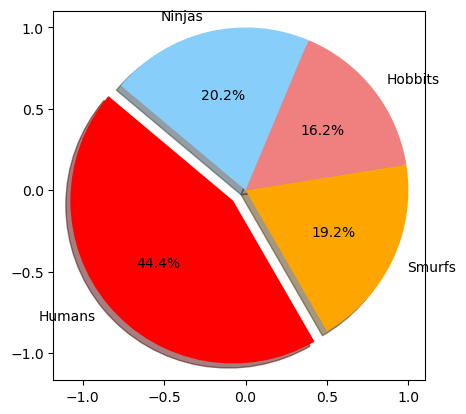

In [29]:
# Labels for the sections of our pie chart
labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",  shadow=True, startangle=140, frame=True);

(array([1133., 1689., 2892., 1490.,  814., 2656., 3226., 4151., 5110.,
        6055.]),
 array([1896. , 1907.2, 1918.4, 1929.6, 1940.8, 1952. , 1963.2, 1974.4,
        1985.6, 1996.8, 2008. ]),
 <BarContainer object of 10 artists>)

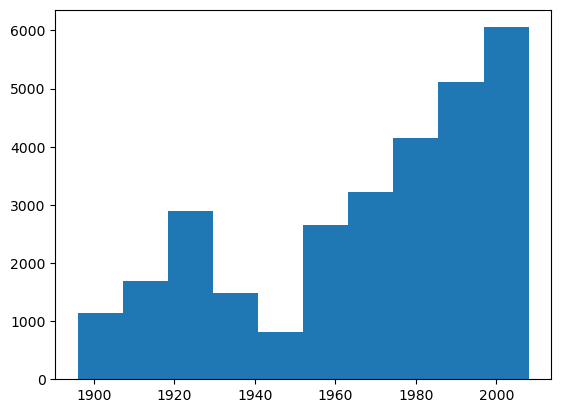

In [30]:
# Create a histogram
plt.hist(oo_df['Edition'])

# Plotting With Seaboard

In [31]:
# http://seaborn.pydata.org
# http://seaborn.pydata.org/examples/index.html
#import seaborn as sns

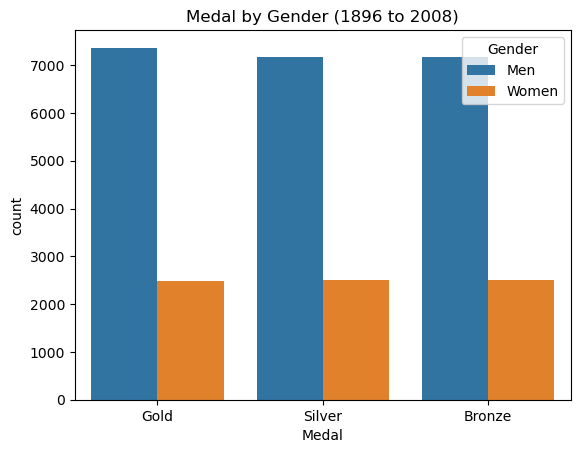

In [32]:
plt.title("Medal by Gender (1896 to 2008)")
sns.countplot(x='Medal',data=oo_df, hue='Gender');

<AxesSubplot: xlabel='Age', ylabel='Count'>

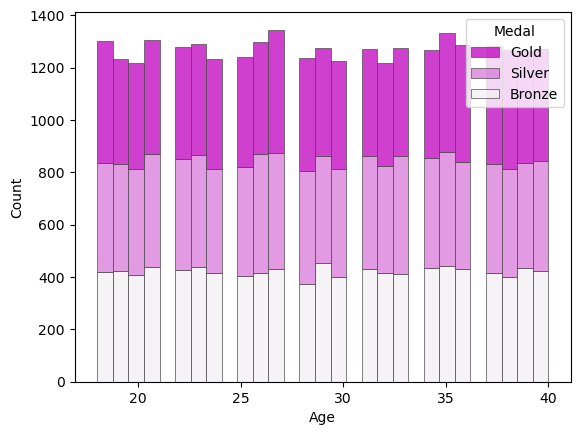

In [33]:
sns.histplot(oo_df, x='Age',hue='Medal',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,)

### Seaboarn Heatmaps

<AxesSubplot: xlabel='Medal', ylabel='NOC'>

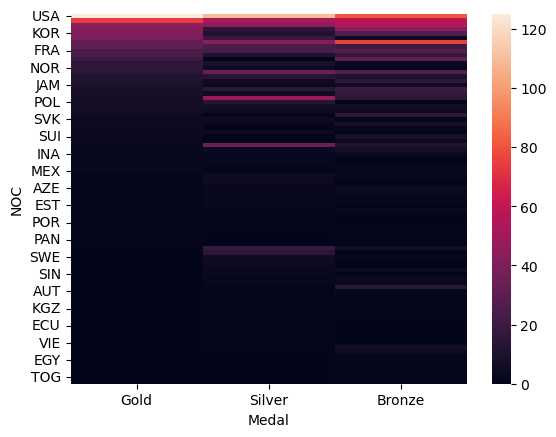

In [34]:
a = oo_df[oo_df['Edition']==2008]
a = a.groupby(['NOC','Medal']).size().unstack('Medal', fill_value=0)
a = a.sort_values(['Gold','Silver','Bronze'], ascending=False)
a = a[['Gold','Silver','Bronze']]
a.head()
sns.heatmap(a)

<AxesSubplot: xlabel='NOC', ylabel='Medal'>

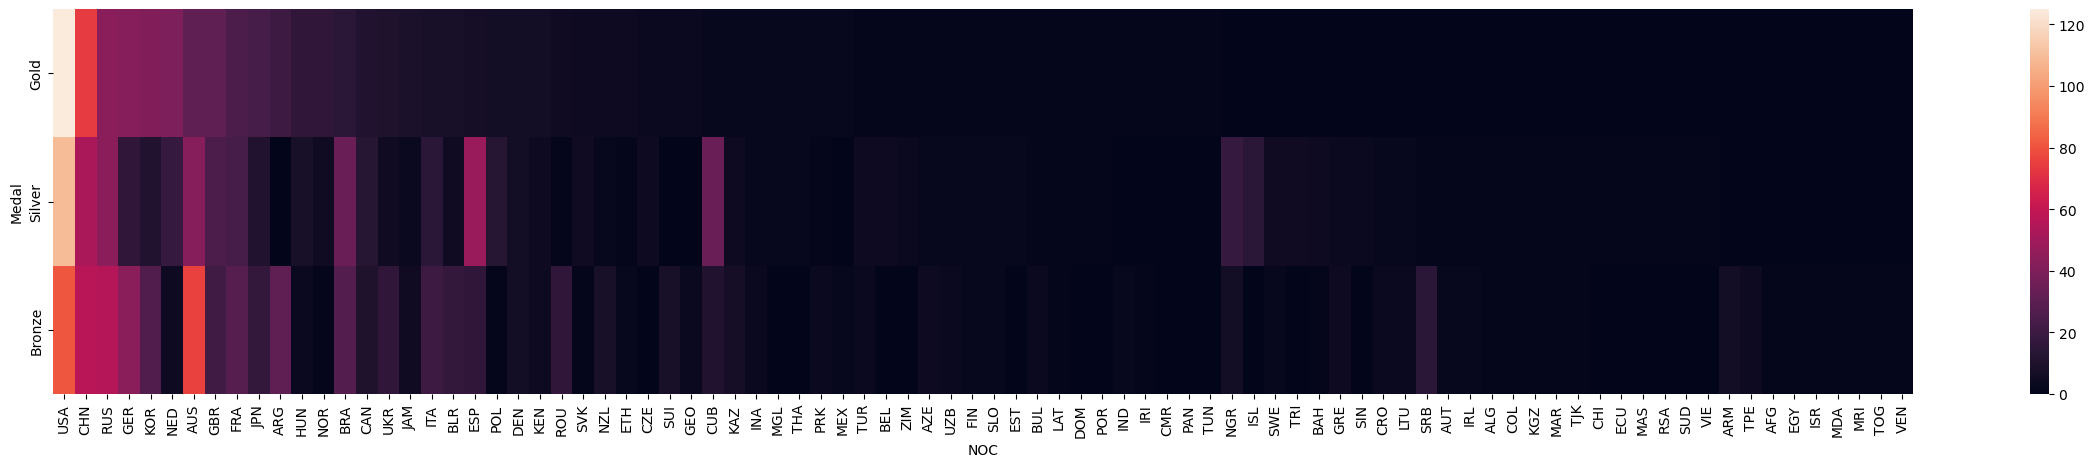

In [35]:
a = a.transpose()
plt.figure(figsize=(30,5))
sns.heatmap(a)